In [2]:
import matplotlib.pyplot as plt
import math
from CircleAreaCalc import area_calc, new_height_calc

<img src="solstise_logo.png">

# **SOLSTISE Simulation Code**
Written for your enjoyment by Matt Hall (mhall12@alumni.nd.edu)

SOLSTISE is a gas jet target for HELIOS and SOLARIS. This code will simulate particle tracks in the solenoids.

To get started, we'll first specify the input file you want to use for the reaction.

In [3]:
print("\nThe default VIKAR input file is: out_eject_unsmeared_all.dat")
yn = input("\nWould you like to use this file? (Y/N) ")

vikar_in = "out_eject_unsmeared_all.dat"

# if the user wants to enter a new file, get the file name here.
# it must end in .dat or .txt to be recognized.
if yn == "N" or yn == "n":
    vikar_in = "buff"
    while vikar_in[-4:] != ".dat" and vikar_in[-4:] != ".txt":
        vikar_in = input("\nEnter the name of the new input file (.dat or .txt): ")
        if vikar_in[-4:] != ".dat" and vikar_in[-4:] != ".txt":
            print("\nERROR: Incorrect file extension...")

print("\nThe file to be used is: " + vikar_in)


The default VIKAR input file is: out_eject_unsmeared_all.dat

Would you like to use this file? (Y/N) 

The file to be used is: out_eject_unsmeared_all.dat


Now, we can determine the parameters for the solenoid bore and pipe used. Below is a visual of the setup:

<img src="SOLSTISEDrawing.png" alt="Drawing" style="width: 400px;"/>

There's a long ISO-160 pipe at the bottom of the solenoid (which will shadow the particles). However, if we keep the cross-sectional area of the pipe the same, we can flatten the top of the pipe. This will lead to less shadowing from the pipe itself. First, we'll select whether the reaction is happening within HELIOS or SOLARIS, since their bores are slightly different sizes:

In [4]:
hors = 0

while hors != 1 and hors != 2:

    hors = int(input("\nWill the reaction be occurring in HELIOS (Enter 1) or SOLARIS (Enter 2)? "))

    if hors != 1 and hors != 2:
        print("\nERROR: Unknown entry...")

    if hors == 1:
        r1 = 0.92/2
    else:
        r1 = 0.9/2


Will the reaction be occurring in HELIOS (Enter 1) or SOLARIS (Enter 2)? 1


Now that we've defined the bore of the solenoid, we can also decide what the pipe should look like. The easiest geometry to work with will be one that plays nice in cylindrical coordinates. So, we'll define the upper boundary of the pipe as a second circle. The area_calc function will then calculate what the height of the 2nd circle has to be from the bottom of the bore. 

The code below will ask for the radius of the 2nd circle -- the larger the radius, the flatter the "pipe" will be on the top. Try starting with 3 meters and rerun the cell if you'd like to change that radius. 


Enter the radius of the 2nd circle in meters: 3


<IPython.core.display.Javascript object>


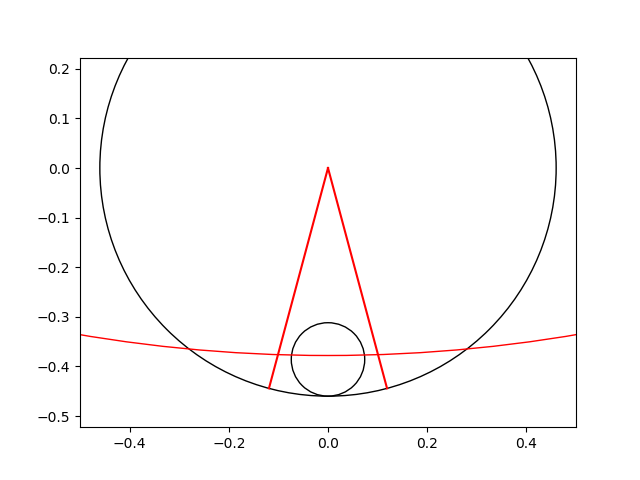

In [5]:
%matplotlib notebook
circle1 = plt.Circle((0, 0), r1, ec='black', color='white')

# ISO 160 pipe dia in m
pipedia = 5.83*2.54/100
pipecenter = pipedia/2 - r1
circlepipe = plt.Circle((0, pipecenter), pipedia/2, ec='black', fill=False)

r2 = float(input("\nEnter the radius of the 2nd circle in meters: "))

ang1, h = area_calc(r1, r2)

fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.add_artist(circlepipe)
ax.axis('equal')
ax.set_xlim((-.5, .5))
ax.set_ylim((-.7, .4))

circle2 = plt.Circle((0, h), r2, ec='red', fill=False)
plt.gcf().gca().add_artist(circle2)

plotreset = 0

Above, you should now be able to see the cross section of the solenoid and the ISO-160 pipe at the bottom, as well as the new "crescent"-shaped pipe bounded by the bottom of the red circle and the bottom of the bore. As you might expect, while the geometry of the pipe will be good for shadowing purposes, it probably won't be good for pumping. So, what happens to the crescent-shaped pipe if we cut off the ends? To keep the area the same, the circle will have to get taller leading to more shadowing, but an improved gas flow. 

In the code below, you'll be told what phi angles the intersection points are at. Then, you'll be able to cut the corners off the crescent by choosing a new angle for the left of the pipe (the one on the right is then calculated). The new_height_calc function then takes the radii of the bore and 2nd circle, as well as the new angle that was input, and recalculates the height that the circle would have to be to keep the cross-sectional area the same. 

In [6]:
if plotreset == 1:
    circle3.set_visible(False)
    lines1.pop(0).remove()
    lines2.pop().remove()

ang1deg = ang1*180/math.pi

if ang1deg > 270:
    ang1deg = 360 - (ang1deg - 180)

ang2deg = 360 - (ang1deg - 180)

print("The circle intersection points are", int(ang1deg), "degrees and", int(ang2deg), "degrees")
yn2 = input("\nWould you like to use new angles for the pipe geometry? (Y/N) ")

# for now accept only one angle, but later we'll do multiple angles.
# anglist = []
pipethickcheck = .15
iso160pipedia = .148082
c2height = 0.0
angin = 0
anginrad = 0
angin2 = 0
angin2rad = 0

if yn2 == "N" or yn2 == "n":
    # anglist.append(ang1)
    angin = ang1deg

    anginrad = angin * math.pi / 180
    angin2 = 360 - (angin - 180)
    angin2rad = angin2 * math.pi / 180

    c2height = h

else:
    circle2.set_visible(False)
    # It has to be less than 270 because that's the bottom of the circle. Actually, 270 is also dumb because
    # the pipe would block the entire path then.
    print("\nNote: the new angle must be greater than", int(ang1deg), "and less than 270 degrees.")

    while (angin < ang1deg or angin > 270) or pipethickcheck > iso160pipedia:
        angin = float(input("\nInput the new angle (in degrees): "))
        if angin < ang1deg:
            print("Error: The angle must be greater than", int(ang1deg), "and less than 270 degrees.")
        elif angin > ang1deg:
            c2height = new_height_calc(r1, r2, angin)
            pipethickcheck = r1 - r2 + c2height
            if pipethickcheck > iso160pipedia:
                print("Error: The calculated pipe height is", pipethickcheck, "m. Which is taller than the ISO 160!")
    # anglist.append(angin)

    anginrad = angin * math.pi / 180
    angin2 = 360 - (angin - 180)
    angin2rad = angin2 * math.pi / 180

    circle3 = plt.Circle((0, c2height), r2, ec='red', fill=False)
    plt.gcf().gca().add_artist(circle3)
    x1, y1 = [0, r1*math.cos(anginrad)], [0, r1*math.sin(anginrad)]
    x2, y2 = [0, r1 * math.cos(angin2rad)], [0, r1 * math.sin(angin2rad)]
    lines1 = plt.plot(x1, y1,color='red')
    lines2 = plt.plot(x2,y2, color='red')

plotreset = 1

The circle intersection points are 239 degrees and 300 degrees

Would you like to use new angles for the pipe geometry? (Y/N) 

Note: the new angle must be greater than 239 and less than 270 degrees.

Input the new angle (in degrees): 255


_____________________________________________________________________________________
After running the above code, scroll back up and see how the pipe's geometry changed!

Once you're happy with how the pipe looks, you may proceed to the next section.
________________________________________________________________________________________